In [1]:
from collections import Counter
import pandas as pd
import plotly.express as px
import sys

sys.path.append('..')
from config import Config

In [2]:
data = []
with open("../sentiment_training_data.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if len(line) > 0:
            line_split = line.split(" ")
            data.append({
                'dragon': line_split[0],
                'sentiment': line_split[1],
                'text': " ".join(line_split[2:])
            })

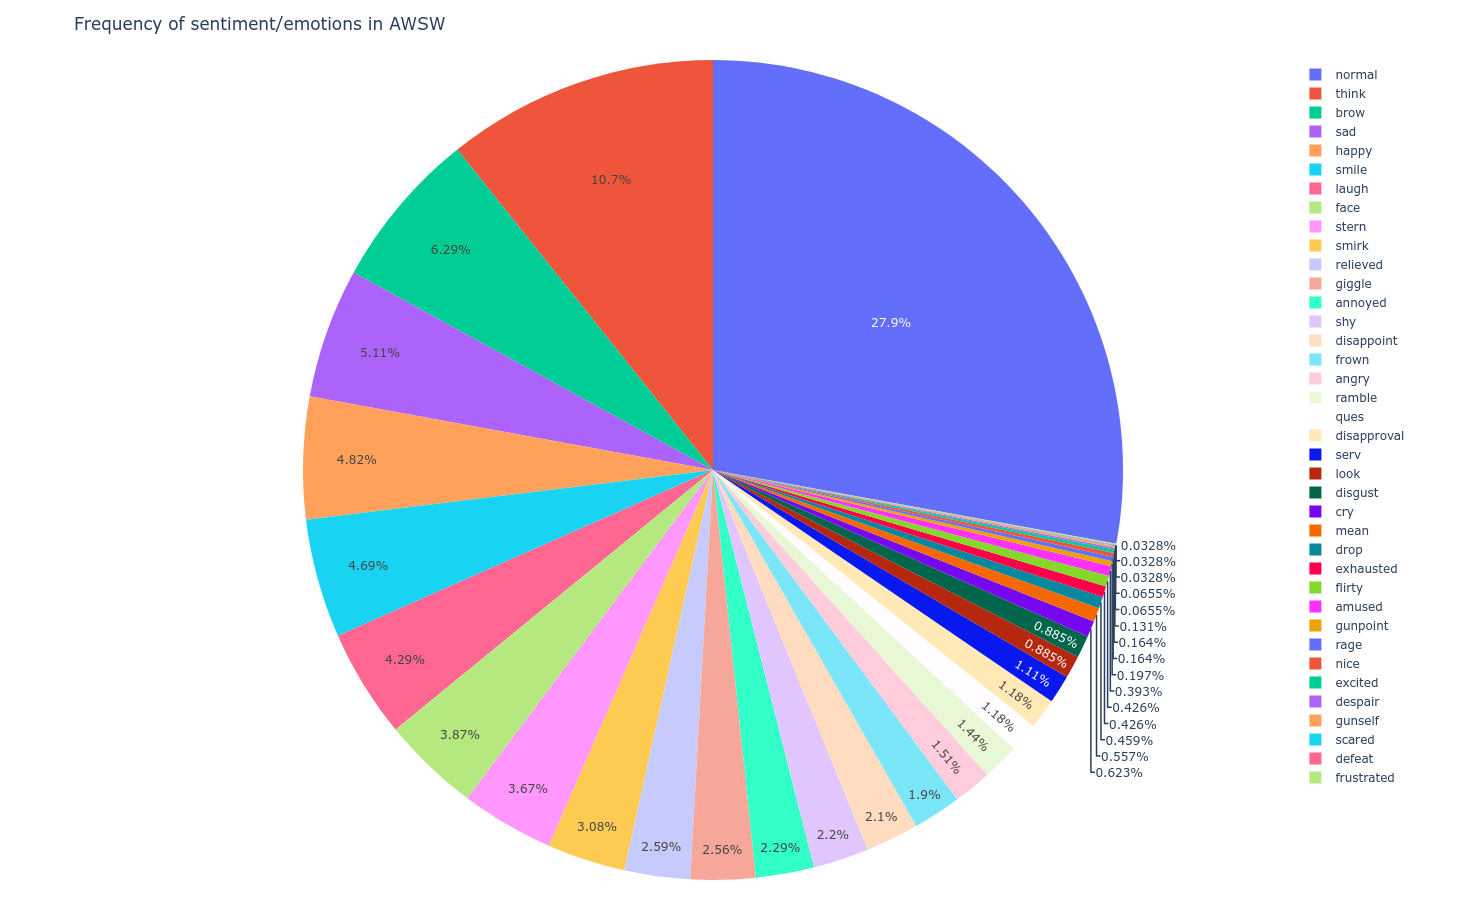

In [3]:
sentiment_counter = Counter()
for d in data:
    sentiment_counter[d['sentiment']] += 1
df = pd.DataFrame.from_dict(sentiment_counter, orient='index').reset_index()
fig = px.pie(df, values=0, names='index', title='Frequency of sentiment/emotions in AWSW')
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor="White",
    height=900
)
fig.show()

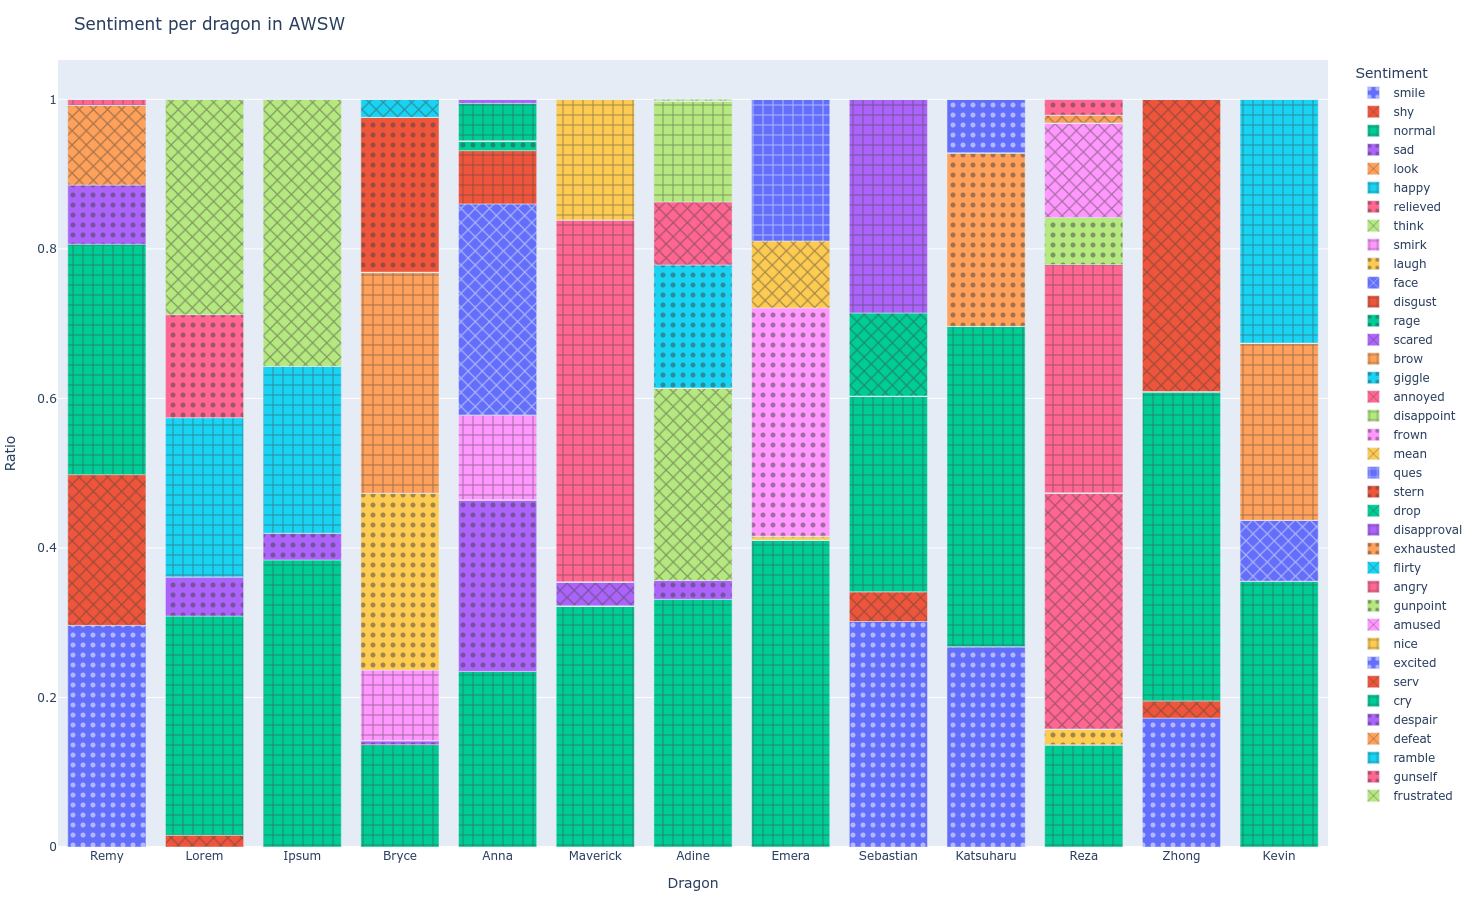

In [4]:
counter_for_dragons = {}
for d in data:
    if not d['dragon'] in counter_for_dragons:
        counter_for_dragons[d['dragon']] = Counter()
    counter_for_dragons[d['dragon']][d['sentiment']] += 1
final_counter = {
    'Dragon': []
}
for dragon in counter_for_dragons:
    final_counter['Dragon'].append(Config.interactable_characters[dragon])

for sentiment in sentiment_counter:
    final_counter[sentiment] = []
    for dragon in counter_for_dragons:
        count = counter_for_dragons[dragon][sentiment]
        final_counter[sentiment].append(count)
        
for i in range(len(final_counter['Dragon'])):
    max_sentiment_count = 0
    for sentiment in sentiment_counter:
        max_sentiment_count += final_counter[sentiment][i]
    for sentiment in sentiment_counter:
        final_counter[sentiment][i] /= max_sentiment_count
        
df = pd.DataFrame(data = final_counter)
fig = px.bar(df, x="Dragon", y = list(sentiment_counter.keys()), title="Sentiment per dragon in AWSW", pattern_shape="variable", pattern_shape_sequence=[".", "x", "+"], labels={"value": "Ratio", "variable": "Sentiment"})
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor="White",
    height=900
)
fig.show()